<a href="https://colab.research.google.com/github/sku1978/sk-share-repo/blob/main/LogisticRegression/advertising/LogisticRegressionAdvertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'> <img src='https://github.com/sku1978/sk-share-repo/blob/main/LogisticRegression/Pierian_Data_Logo.png?raw=1' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [220]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [221]:
ad_data=pd.read_csv('https://raw.githubusercontent.com/sku1978/sk-share-repo/main/LogisticRegression/advertising/data/advertising.csv')

**Check the head of ad_data**

In [222]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [223]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [224]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

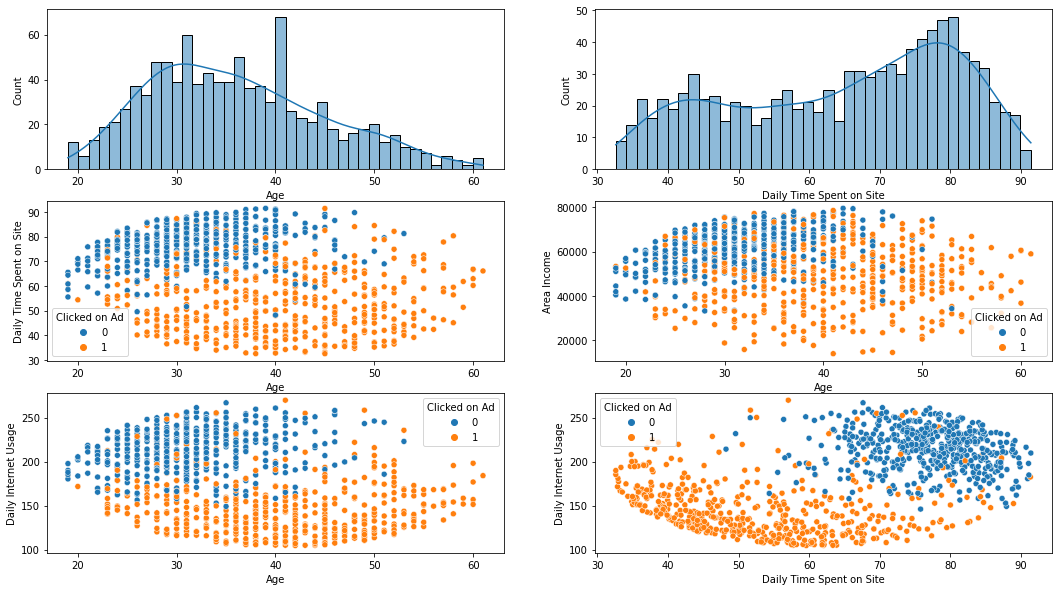

In [225]:
fig, axs=plt.subplots(3,2,squeeze=True,figsize=(18,10))
sns.histplot(ad_data['Age'],ax=axs[0][0],bins=40,kde=True)
sns.histplot(ad_data['Daily Time Spent on Site'],ax=axs[0][1],bins=40,kde=True)
sns.scatterplot(x='Age', y='Daily Time Spent on Site', data=ad_data, hue='Clicked on Ad', ax=axs[1][0])
sns.scatterplot(x='Age', y='Area Income', data=ad_data, hue='Clicked on Ad', ax=axs[1][1])
sns.scatterplot(x='Age', y='Daily Internet Usage', data=ad_data, hue='Clicked on Ad', ax=axs[2][0])
sns.scatterplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, hue='Clicked on Ad', ax=axs[2][1])

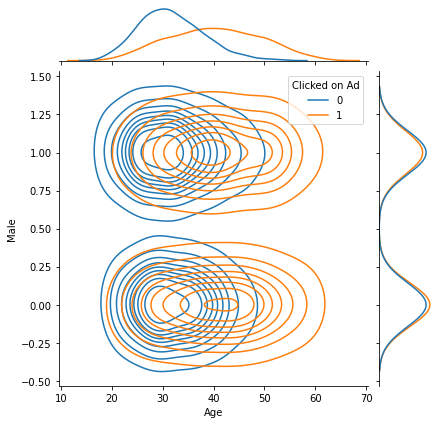

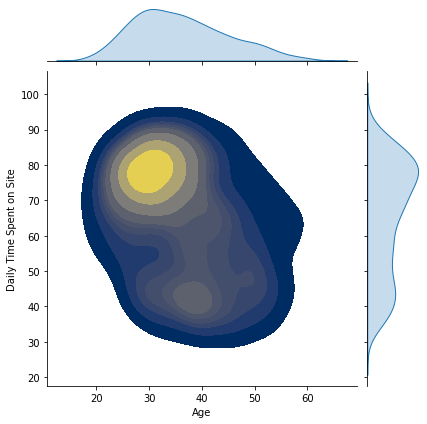

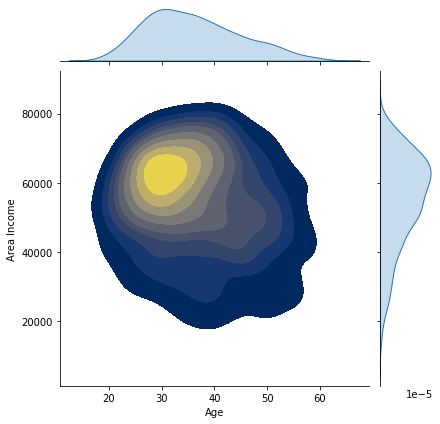

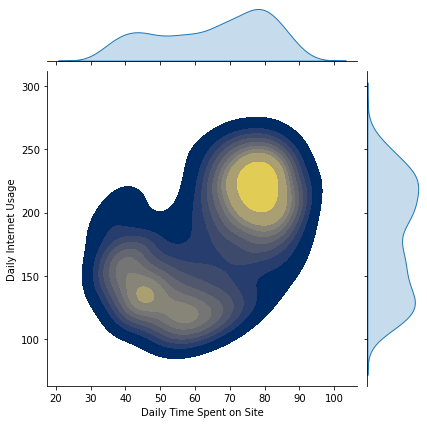

In [226]:
sns.jointplot(x='Age', y='Male', data=ad_data, hue='Clicked on Ad', kind="kde")
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind="kde", cmap='cividis', fill=True)
sns.jointplot(x='Age', y='Area Income', data=ad_data, kind="kde", cmap='cividis', fill=True)
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, kind="kde", cmap='cividis', fill=True)


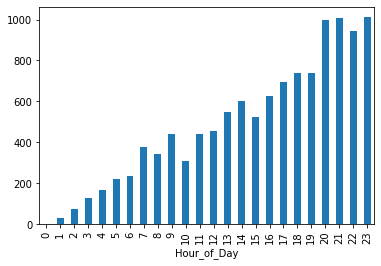

In [227]:
ad_data['Hour_of_Day']=ad_data.Timestamp.apply(lambda x: math.floor(pd.to_datetime(x).hour))
hour_group=ad_data.groupby(['Hour_of_Day'])['Hour_of_Day'].sum()
hour_group.plot(kind='bar')

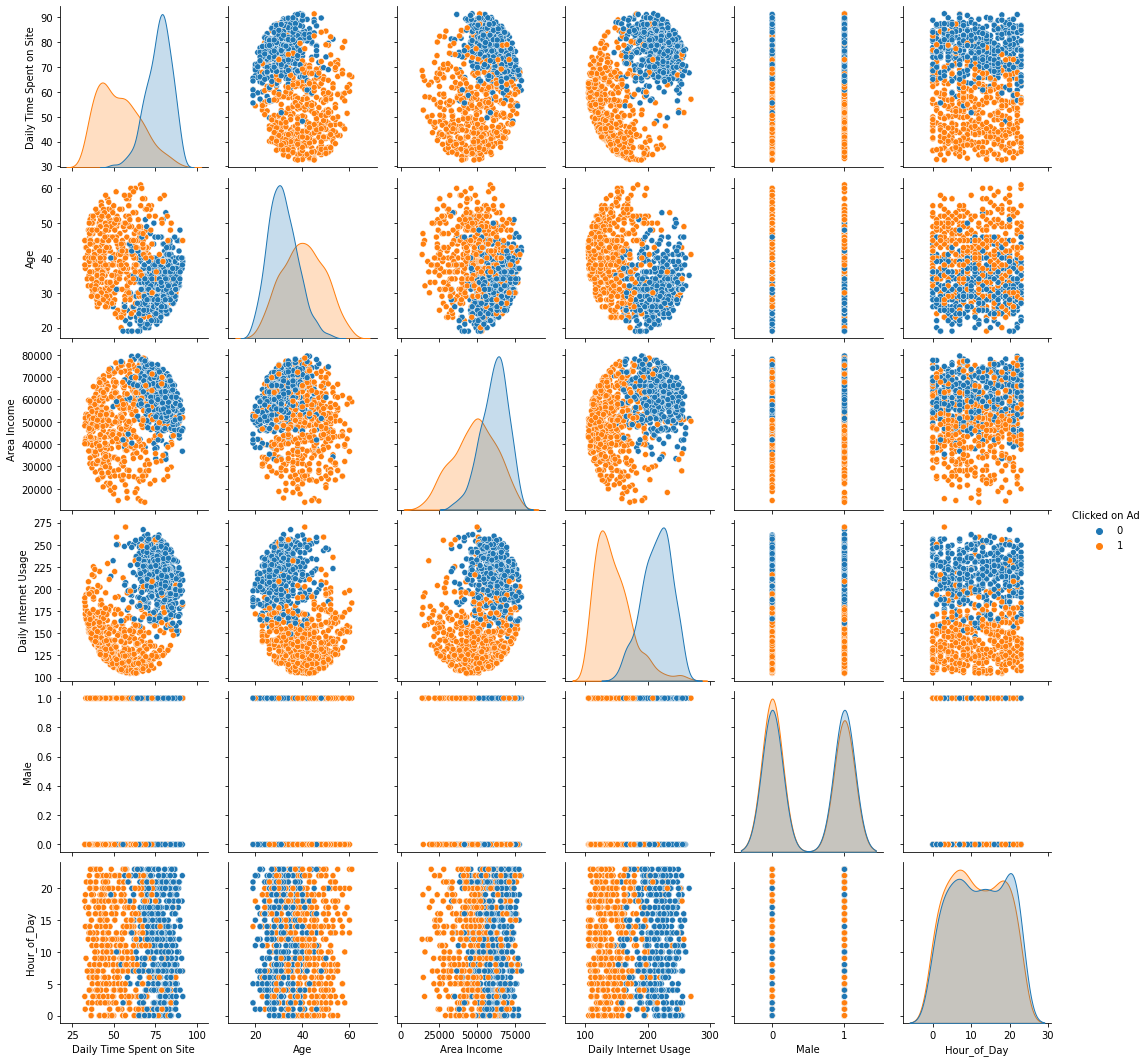

In [228]:
sns.pairplot(data=ad_data, hue='Clicked on Ad')

In [229]:
ad_data['Quarter of Day']=ad_data.Hour_of_Day.apply(lambda x: math.floor(x/6)+1)
ad_data=pd.concat([ad_data, pd.get_dummies(ad_data['Quarter of Day'], prefix='QoD', drop_first=True)], axis=1)

**Create a jointplot showing Area Income versus Age.**

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

In [230]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour_of_Day,Quarter of Day,QoD_2,QoD_3,QoD_4
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,1,0,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,1,0,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,4,0,0,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,1,0,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,21,4,0,0,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,2,1,0,0,0
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,17,3,0,1,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,2,1,0,0,0


# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [231]:
ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp', 'Hour_of_Day', 'Quarter of Day'], axis=1, inplace=True)
X=ad_data.drop(['Clicked on Ad'],axis=1)
y=ad_data['Clicked on Ad']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [233]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)

In [234]:
pd.DataFrame(classification_report(y_test, predictions, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.861878,0.962963,0.909621,162.000000
1,0.959732,0.851190,0.902208,168.000000
accuracy,0.906061,0.906061,0.906061,0.906061
macro avg,0.910805,0.907077,0.905915,330.000000
weighted avg,0.911695,0.906061,0.905847,330.000000


** Train and fit a logistic regression model on the training set.**

In [237]:
confusion_matrix(y_test, predictions)

array([[156,   6],
       [ 25, 143]])

In [235]:
lr.coef_

array([[-5.42027980e-02,  2.60392416e-01, -1.71450777e-05,
        -2.67134042e-02,  2.31040213e-03,  1.93998811e-03,
         1.43430091e-03,  1.33176147e-03]])

## Predictions and Evaluations
** Now predict values for the testing data.**

** Create a classification report for the model.**

## Great Job!